In [ ]:
import time as time
import math

import numpy as np
import numpy.linalg as nplin
import matplotlib.pyplot as plt
import ffmpeg

from numba import njit
from numba.typed import Dict
from numba.core import types 

In [ ]:
def measure_time(func):
    def decorated(param):
        x = time.time()
        res = func(param)
        dt = time.time()-x
        print(dt)
        return dt, res
    #
    return decorated
# 

In [ ]:
@njit 
def delta(a, b): 
    if a == b:
        return 1 
    else : 
        return 0 
    #
# 


In [ ]:
@njit
def element_fun(i, j, Bmax, Amax, k1, k2):
    
    A = i // (Bmax + 1)
    B = i % (Bmax + 1)
    
    Ap = j // (Bmax + 1)
    Bp = j % (Bmax + 1)
    
    Mij =  k1*delta(A+1, Ap)*delta(B-1, Bp)
    Mij += k2*delta(A-1, Ap)*delta(B+1, Bp)
    Mij += -(k1+k2)*delta(Ap,A)*delta(Bp,B)
    
    return Mij 

@njit
def fill_matrix(mat_len, Bmax, Amax, mat, k1, k2):
    for i in range(mat_len): 
        for j in range(mat_len):
            mat[i][j] = element_fun(i, j, Bmax, Amax, k1, k2)
        #
    #
    
    return mat 
#

@njit 
def FSP_cutoff(mat_len, mat):
    for i in range(mat_len):
        mat[i][i] = mat[i][i] - sum(mat[:,i]) 
    #
    return mat
#

In [ ]:
para_list = [1, 1]

Amax = 5
Bmax = 5
mat_len = (Amax+1) * (Bmax + 1)
M = np.zeros((mat_len, mat_len), dtype=float)

M = fill_matrix(mat_len, Bmax, Amax, M, *para_list)
M = FSP_cutoff(mat_len, M)
eig_val, eig_vec = nplin.eig(M)

prob_eq = np.zeros(( Amax+1, Bmax+1))
max_eig = max(eig_val)
max_idx_list = np.where(eig_val > -1000)[0]

for max_idx in max_idx_list:
    max_vec = eig_vec[:,max_idx]
    print(eig_val[max_idx])


    vec_norm = sum((max_vec))
    for i in range(len(max_vec)): 
        A = i // (Bmax + 1)
        B = i % (Bmax + 1)
        
        
        prob_eq[A, B] = (max_vec[i])/vec_norm
    
    plt.xlabel("A")
    plt.ylabel("B")
    plt.imshow(prob_eq, aspect=1, origin="lower")
    plt.title(f"eig_val = {eig_val[max_idx]}")
    plt.colorbar()
    plt.show()
    #plt.savefig(f"eigval_{max_idx}.png", dpi=200)
    #plt.close("all")


0.0
0.0
2.0202020202020203
4.040404040404041
6.0606060606060606
8.080808080808081
10.101010101010102
12.121212121212121
14.141414141414142
16.161616161616163
18.181818181818183
20.202020202020204
22.222222222222225
24.242424242424242
26.262626262626263
28.282828282828284
30.303030303030305
32.323232323232325
34.343434343434346
36.36363636363637
38.38383838383839
40.40404040404041
42.42424242424243
44.44444444444445
46.46464646464647
48.484848484848484
50.505050505050505
52.525252525252526
54.54545454545455
56.56565656565657
58.58585858585859
60.60606060606061
62.62626262626263
64.64646464646465
66.66666666666667
68.68686868686869
70.70707070707071
72.72727272727273
74.74747474747475
76.76767676767678
78.7878787878788
80.80808080808082
82.82828282828284
84.84848484848486
86.86868686868688
88.8888888888889
90.90909090909092
92.92929292929294
94.94949494949496
96.96969696969697
98.98989898989899
101.01010101010101
103.03030303030303
105.05050505050505
107.07070707070707
109.0909090909091


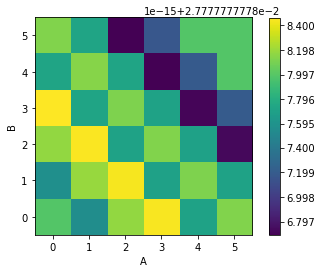

In [78]:
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FFMpegWriter
img = [] # some array of images
frames = [] # for storing the generated images
fig = plt.figure()
para_list = [1, 1]

Amax = 5
Bmax = 5
mat_len = (Amax+1) * (Bmax + 1)
M = np.zeros((mat_len, mat_len), dtype=float)
M = fill_matrix(mat_len, Bmax, Amax, M, *para_list)
M = FSP_cutoff(mat_len, M)

mat = Transition_Matrix(M)
    
def update(frame):
    fig.clear()
    ax = plt.subplot(1,1,1)
    t = frame 
    print(t)
    max_vec = mat.get_state_t(t, [1/len(M)**2 for _ in range(len(M))])
    vec_norm = sum((max_vec))
    
    for i in range(len(max_vec)): 
        A = i // (Bmax + 1)
        B = i % (Bmax + 1)
        
        
        prob_eq[A, B] = (max_vec[i])/vec_norm
        
    plt.xlabel("A")
    plt.ylabel("B")
    
    
    im = plt.imshow(prob_eq, aspect=1, origin="lower", animated=True)
    plt.colorbar(im)
writer=FFMpegWriter(bitrate=500)
ani = FuncAnimation(fig, update, frames = np.linspace(0,200,100))
ani.save("ani.avi", dpi=300, writer=writer)
